In [1]:
import numpy as np
from sklearn import datasets, model_selection, metrics
from decision_tree import DecisionTree
import matplotlib.pyplot as plt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


# Training on Iris Dataset

In [2]:
iris = datasets.load_iris()

X = np.array(iris.data)
Y = np.array(iris.target)

X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.25, random_state=0)
print("Train Shape:", X_train.shape)
print("Train Shape:", X_test.shape)

Train Shape: (112, 4)
Train Shape: (38, 4)


In [3]:
# Building the tree
my_tree = DecisionTree(max_depth=4, min_samples_leaf=1, min_information_gain=0)
my_tree.train(X_train, Y_train)

In [4]:
# Let's see the tree
my_tree.print_tree()

                                                -> LEAF | Label Counts = 0.0->10 | Pred Probs = [1. 0. 0.]
                                -> NODE | Information Gain = 0.998363672593813 | Split IF X[2] < 3.0 THEN left O/W right
                                                -> LEAF | Label Counts = 1.0->11 | Pred Probs = [0. 1. 0.]
                -> NODE | Information Gain = 0.33977167868466684 | Split IF X[1] < 3.2 THEN left O/W right
                                                -> LEAF | Label Counts = 0.0->10 | Pred Probs = [1. 0. 0.]
                                -> NODE | Information Gain = 0.0 | Split IF X[0] < 5.1 THEN left O/W right
                                                -> LEAF | Label Counts = 0.0->17 | Pred Probs = [1. 0. 0.]
-> NODE | Information Gain = 0.7095311377468411 | Split IF X[3] < 1.3 THEN left O/W right
                                                -> LEAF | Label Counts = 1.0->12 | Pred Probs = [0. 1. 0.]
                                -> NODE 

In [5]:
# Let's see the Train performance
train_preds = my_tree.predict(X_set=X_train)
print("TRAIN PERFORMANCE")
print("Train size", len(Y_train))
print("True preds", sum(train_preds == Y_train))
print("Train Accuracy", sum(train_preds == Y_train) / len(Y_train))

TRAIN PERFORMANCE
Train size 112
True preds 106
Train Accuracy 0.9464285714285714


In [6]:
# Let's see the Test performance
test_preds = my_tree.predict(X_set=X_test)
print("TEST PERFORMANCE")
print("Test size", len(Y_test))
print("True preds", sum(test_preds == Y_test))
print("Accuracy", sum(test_preds == Y_test) / len(Y_test))

TEST PERFORMANCE
Test size 38
True preds 34
Accuracy 0.8947368421052632


# Training on Breast Cancer Dataset

In [7]:
# Load data
data = datasets.load_breast_cancer()
X = data.data
Y = data.target

X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.2, random_state=0)
print("Train Shape:", X_train.shape)
print("Train Shape:", X_test.shape)

Train Shape: (455, 30)
Train Shape: (114, 30)


In [8]:
# Building the tree
my_tree_2 = DecisionTree(max_depth=4, min_samples_leaf=1, min_information_gain=0.05)
my_tree_2.train(X_train, Y_train)

In [9]:
my_tree_2.print_tree()

                -> LEAF | Label Counts = 0.0->5, 1.0->222 | Pred Probs = [0.02202643 0.97797357]
-> NODE | Information Gain = 0.42814844913368955 | Split IF X[20] < 14.85 THEN left O/W right
                                                -> LEAF | Label Counts = 0.0->4, 1.0->53 | Pred Probs = [0.07017544 0.92982456]
                                -> NODE | Information Gain = 0.3922674180993554 | Split IF X[26] < 0.2649 THEN left O/W right
                                                -> LEAF | Label Counts = 0.0->43, 1.0->14 | Pred Probs = [0.75438596 0.24561404]
                -> NODE | Information Gain = 0.35402590419050384 | Split IF X[20] < 18.409999999999997 THEN left O/W right
                                -> LEAF | Label Counts = 0.0->113, 1.0->1 | Pred Probs = [0.99122807 0.00877193]


In [10]:
# Let's see the Train performance
train_preds = my_tree_2.predict(X_set=X_train)
print("TRAIN PERFORMANCE")
print("Train size", len(Y_train))
print("True preds", sum(train_preds == Y_train))
print("Train Accuracy", sum(train_preds == Y_train) / len(Y_train))

TRAIN PERFORMANCE
Train size 455
True preds 431
Train Accuracy 0.9472527472527472


In [11]:
# Let's see the Test performance
test_preds = my_tree_2.predict(X_set=X_test)
print("TEST PERFORMANCE")
print("Test size", len(Y_test))
print("True preds", sum(test_preds == Y_test))
print("Accuracy", sum(test_preds == Y_test) / len(Y_test))

TEST PERFORMANCE
Test size 114
True preds 108
Accuracy 0.9473684210526315


# Diabetes Data (from OpenML)

In [12]:
from sklearn.datasets import fetch_openml

In [14]:
diabetes = fetch_openml(name="diabetes", as_frame=False)

/Users/eno/opt/anaconda3/envs/deeplearning/lib/python3.11/site-packages/sklearn/datasets/_openml.py:301: UserWarning: Multiple active versions of the dataset matching the name diabetes exist. Versions may be fundamentally different, returning version 1.
  warn(
/Users/eno/opt/anaconda3/envs/deeplearning/lib/python3.11/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [15]:
diabetes_features = np.array(diabetes.data)
print(diabetes_features.shape)
diabetes_labels = np.array([y=="tested_positive" for y in diabetes.target]).astype(int)
print(diabetes_labels.shape)

(768, 8)
(768,)


In [16]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(diabetes_features, diabetes_labels, test_size=0.2, random_state=0)

In [17]:
# Lets see how model performs with different max_depth thresholds

train_accuracy_dict = {}
test_accuracy_dict = {}
# depth_occured = {}

for depth in range(2, 21):
    tree_model = DecisionTree(max_depth=depth, min_samples_leaf=1)
    tree_model.train(X_train, Y_train)

    # depth_occured[depth] = tree_model.current_de

    # Train performance
    train_preds = tree_model.predict(X_set=X_train)
    train_accuracy = sum(train_preds == Y_train) / len(Y_train)
    train_accuracy_dict[depth] = train_accuracy

    # Test performance
    test_preds = tree_model.predict(X_set=X_test)
    test_accuracy = sum(test_preds == Y_test) / len(Y_test)
    test_accuracy_dict[depth] = test_accuracy

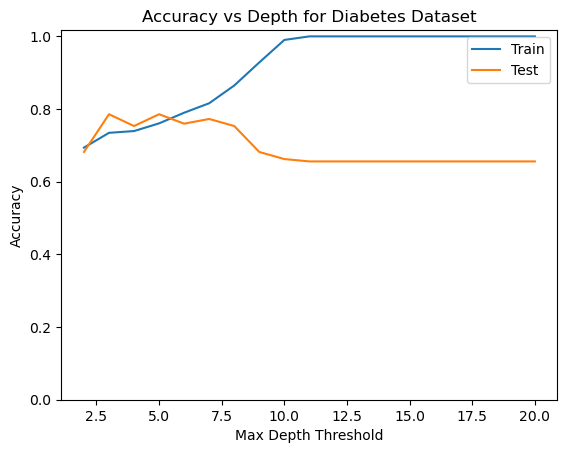

In [18]:
plt.plot(train_accuracy_dict.keys(), train_accuracy_dict.values(), label="Train")
plt.plot(test_accuracy_dict.keys(), test_accuracy_dict.values(), label="Test")
plt.title("Accuracy vs Depth for Diabetes Dataset")
plt.xlabel("Max Depth Threshold")
plt.ylabel("Accuracy")
plt.legend()
plt.ylim(bottom=0.0)
plt.show()

#### We can see that the tree starts to overfit after max_depth exceeds 5